In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('4_income.csv')
df.head()

,nombre,edad,ingresos
0,Rob,27,7000000
1,Michael,29,9000000
2,Mohan,29,6100000
3,Ismail,28,6000000
4,Kory,42,15000000


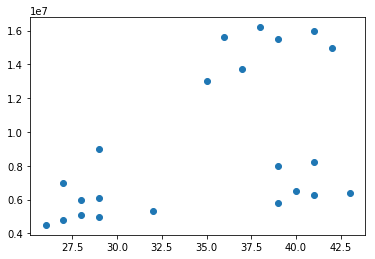

In [3]:
plt.scatter(df['edad'], df['ingresos'])

In [28]:
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
y_predicted = km.fit_predict(df[['edad', 'ingresos']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [34]:
df['cluster'] = y_predicted
df.head(100)

,nombre,edad,ingresos,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,3
9,Angelina,0.529412,0.726496,3


In [35]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Text(0, 0.5, 'ingresos')

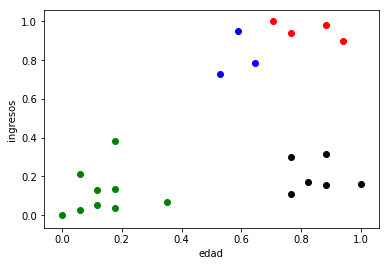

In [36]:
plt.scatter(df1['edad'], df1['ingresos'], color='green')
plt.scatter(df2['edad'], df2['ingresos'], color='red')
plt.scatter(df3['edad'], df3['ingresos'], color='black')
plt.scatter(df4['edad'], df4['ingresos'], color='blue')
plt.xlabel('edad')
plt.ylabel('ingresos')

In [37]:
scaler = MinMaxScaler()
scaler.fit(df[['ingresos']])
df['ingresos'] = scaler.transform(df[['ingresos']])
df.head()

,nombre,edad,ingresos,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [10]:
scaler.fit(df[['edad']])
df['edad'] = scaler.transform(df[['edad']])
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,nombre,edad,ingresos,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [38]:
y_predicted = km.fit_predict(df[['edad', 'ingresos']])
y_predicted

array([1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [39]:
km.cluster_centers_

array([[0.58823529, 0.82051282],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.82352941, 0.95512821]])

In [40]:
df['cluster'] = y_predicted
df.head()

,nombre,edad,ingresos,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,3


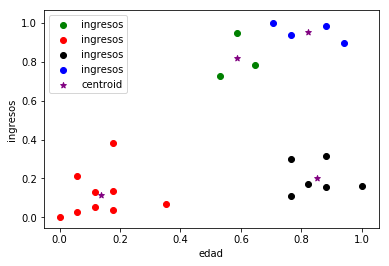

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['edad'], df1['ingresos'], color='green')
plt.scatter(df2['edad'], df2['ingresos'], color='red')
plt.scatter(df3['edad'], df3['ingresos'], color='black')
plt.scatter(df4['edad'], df4['ingresos'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('edad')
plt.ylabel('ingresos')
plt.legend()

In [42]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['edad', 'ingresos']])
    sse.append(km.inertia_)

In [43]:
sse

[5.434011511988179,
 2.0911363886990775,
 0.4750783498553095,
 0.3491047094419566,
 0.2621792762345213,
 0.21066678488010526,
 0.17310821424993494,
 0.14090581089405507,
 0.10188787724979423]

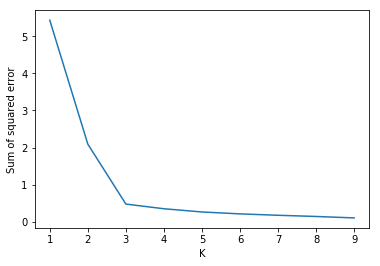

In [44]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)